In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [2]:
# make_classification
X , y = make_classification(n_samples = 100, n_features=4, n_redundant=0, n_classes=2, random_state=53)

In [3]:
X.shape

(100, 4)

In [4]:
y.shape

(100,)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
X_train.shape

(80, 4)

In [9]:
y_test.shape

(20,)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()

In [12]:
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
model.score(X_train, y_train)

0.9125

In [14]:
model.score(X_test, y_test)

0.8

In [15]:
model.predict(np.array([ 0.94276373,  0.52329782,  0.98182194,  2.78591191]).reshape(1,4))

array([1])

In [16]:
model.predict_proba(np.array([ 0.94276373,  0.52329782,  0.98182194,  2.78591191]).reshape(1,4))

array([[0.00206084, 0.99793916]])

In [17]:
model.coef_

array([[ 0.27028362,  0.02233279, -0.23013246,  2.20433402]])

In [18]:
model.intercept_

array([0.00094601])

### decision boundary 

In [20]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=53)

In [21]:
X.shape

(100, 2)

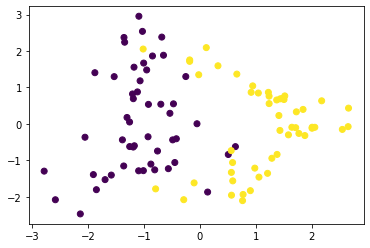

In [22]:
plt.scatter(X.T[0], X.T[1], c=y)

In [23]:
model = LogisticRegression()
model.fit(X,y)


LogisticRegression()

In [24]:
x11, x22 = np.meshgrid(
    np.linspace(X.T[0].min(), X.T[0].max(),1000),
    np.linspace(X.T[1].min(), X.T[1].max(),1000))

In [25]:
x11.shape

(1000, 1000)

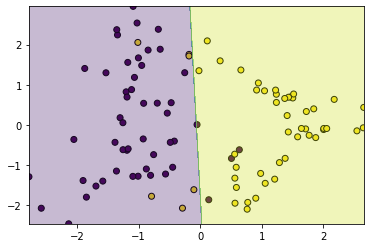

In [27]:
plt.scatter(X.T[0], X.T[1], c=y, edgecolors= "black" )
plt.contourf(x11,x22,
             model.predict(
                 np.array(
                     [x11.ravel(),x22.ravel()]).T).reshape(x11.shape), alpha= 0.3)

### decision boundary with polynomial features

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate

In [30]:
model = LogisticRegression()
poly = PolynomialFeatures(2)
poly.fit(X)

PolynomialFeatures()

In [31]:
from sklearn import preprocessing
for p in range(2,9):
    poly = PolynomialFeatures(p)
    poly.fit(X)
    score = cross_validate(model, preprocessing.scale(poly.transform(X)), y, cv = 10)["test_score"].mean()
    ts = cross_validate(model, preprocessing.scale(poly.transform(X)), y, cv = 10, return_train_score=True)["train_score"].mean()
    print(f"Derecem : {p}, Train score : {round(ts,3)}, test score {round(score,3)}")

Derecem : 2, Train score : 0.948, test score 0.91
Derecem : 3, Train score : 0.949, test score 0.91
Derecem : 4, Train score : 0.949, test score 0.92
Derecem : 5, Train score : 0.951, test score 0.93
Derecem : 6, Train score : 0.952, test score 0.92
Derecem : 7, Train score : 0.952, test score 0.92
Derecem : 8, Train score : 0.952, test score 0.92


In [44]:
# we will draw decision boundaries using degree=2 and degree=5

In [32]:
model = LogisticRegression(solver = "liblinear")
poly = PolynomialFeatures(2)
poly.fit(X)

PolynomialFeatures()

In [33]:
model.fit(poly.transform(X),y)

LogisticRegression(solver='liblinear')

In [34]:
x11, x22 = np.meshgrid(
    np.linspace(X.T[0].min(), X.T[0].max(),1000),
    np.linspace(X.T[1].min(), X.T[1].max(),1000))

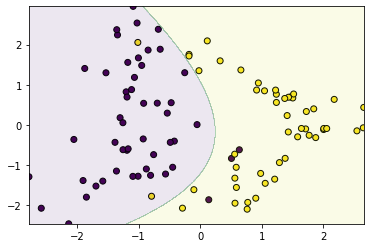

In [35]:
plt.scatter(X.T[0], X.T[1], c=y, edgecolors= "black" )
plt.contourf(x11,x22,
             model.predict(poly.transform(
                 np.array(
                     [x11.ravel(),x22.ravel()]).T)).reshape(x11.shape), alpha= 0.1)

In [36]:
model = LogisticRegression(solver = "liblinear")
poly = PolynomialFeatures(5)
poly.fit(X)

PolynomialFeatures(degree=5)

In [37]:
model.fit(poly.transform(X),y)

LogisticRegression(solver='liblinear')

In [38]:
x11, x22 = np.meshgrid(
    np.linspace(X.T[0].min(), X.T[0].max(),1000),
    np.linspace(X.T[1].min(), X.T[1].max(),1000))

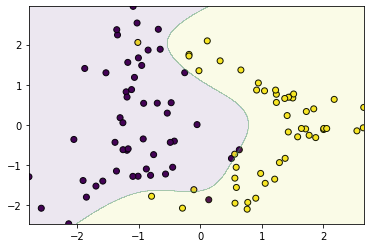

In [39]:
plt.scatter(X.T[0], X.T[1], c=y, edgecolors= "black" )
plt.contourf(x11,x22,
             model.predict(poly.transform(
                 np.array(
                     [x11.ravel(),x22.ravel()]).T)).reshape(x11.shape), alpha= 0.1)